## EECS 491 Assignment 2

Due Mon Mar 8 before midnight. 100 points total.

### Submitting assignments to Canvas

- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS491-A2-yourcaseid.ipynb`
  - `EECS491-A2-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS491-A2-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS491-A2-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

In [6]:
import pgmpy
import networkx as nx
from matplotlib import pyplot as plt

### Q1. Conditional Independence (10 pts)

Consider the following Bayes net. (Recreated using networkx for practice)

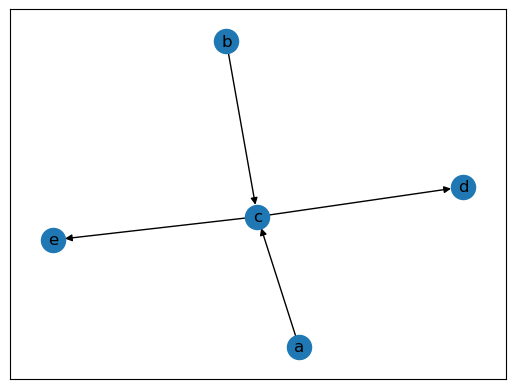

In [35]:
# create graph
g = nx.DiGraph()
g.add_nodes_from(["a", "b", "c", "d", "e"])
g.add_edges_from([("a", "c"), ("b", "c"), ("c", "d"), ("c", "e")])

# plot graph
nx.draw_networkx(g)
plt.show()

1.1. (5 pts) Show that $a$ is independent of $b$ given no other infomration, i.e.
$$
a \perp b\, |\, \varnothing
$$
First we can apply the definition of independence to show what we want to prove. Then we can compare this to what is derived from our graphical model.
$$ a \perp b \implies p(a, b)=p(a)p(b) $$
$$ p(a, b)=\sum_{c, d, e} p(a, b, c, d, e)=\sum_c p(c|a,b)p(a)p(b) * \sum_d p(d|c) * \sum_e p(e|c) $$
Since we know that $\sum_a p(a|\text{parent of } a) = 1$, this reduces to
$$ = \sum_c p(c|a,b)p(a)p(b) * 1 * 1 = p(a)p(b) $$

1.2. (5 pts) Prove or disprove the following using basic probability (i.e. not using d-separation)
$$
a \perp b\, |\, e
$$
First, we can apply the definition of independence to show what we want to prove. Then we can compare this to what is derived from our graphical model.
$$ a \perp b|e \implies p(a, b|e) = p(a|e)p(b|e) $$
Based on this, we can show that $p(a|e) = p(a|b,e)$ because $p(a|b)=\frac{p(a,b)}{p(b)}$
$$ p(a|e)=\frac{p(a|e)p(b|e)}{p(b|e)}=\frac{p(a,b|e)}{p(b|e)}=p(a|b,e) $$
In addition to this, we know that $a \perp b | \varnothing$ is true, so we can check if $p(a|b,e)=p(a|e)$
$$ p(a|b,e)=\frac{p(a,b,e)}{p(b,e)}=\frac{\sum_c p(a,b,c,e)}{\sum_a \sum_c p(a,b,c,e)}=\frac{\sum_c p(e|c)p(a,b,c)}{\sum_a \sum_c p(e|c)p(a|a,b)p(a,b)}=\frac{\sum_c p(e|c)p(a,b,c)}{\sum_c p(e|c)p(b,c)} $$
$$ p(a|e)=\frac{p(a,e)}{p(e)}=\frac{\sum_c p(a,b,c,e)}{\sum_a \sum_c p(a,b,c,e)}=\frac{\sum_c p(e|c) \sum_b p(a,b,c)}{\sum_c p(e|c)p(c)}=\frac{\sum_c p(e|c)p(a,c)}{\sum_c p(e|c)p(c)} $$
Based on the above analysis, the final results show that if $b=1$ then $a \perp b | e$

### Q2. Conditional Independence and Causality (5 pts)

Consider the following model

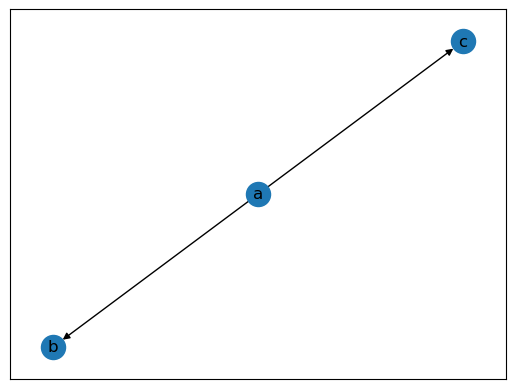

In [41]:
g = nx.DiGraph()
g.add_nodes_from(["a","b","c"])
g.add_edges_from([("a", "b"), ("a", "c")])
nx.draw_networkx(g)

Show that this causal relationship suggested by the arrows does not necessarily hold, because the identical distribution can be represented by a model defined by different conditional distributions.  What conditional independence assumption does this model make?<br><br>
This model makes the assumption that $b \perp c|a$ since $p(b,c|a)=p(b|a)p(c|a)$. Therefore, the joint distribution of the model is $p(a,b,c)=p(b|c)p(a|c)p(a)$. But, this joint distribution can be modeled several different ways. One additional way, this distribution can be modeled is $p(a,b,c)=p(c|a,b)p(a|b)p(b)$. Therefore, the purpose of this graph does not necessarily hold.

### Q3. Model Complexity, Free Parameters, and Simplifying Assumptions (20 pts)

3.1. (5 pts) Consider a *general* joint probability distribution with $N$ variables $x_1 \ldots x_N$ each of which can have $K$ values. What is the expression for the joint distribution in terms of conditional probabilities?
$$ p(x_1,x_2,...,x_N)=p(x_1|x_2,x_3,...,x_N)p(x_2,x_3,...,x_N) $$
$$ =p(x_1|x_2,x_3,...,x_N)p(x_2|x_3,x_4,...,x_N)p(x_3,...,x_N) $$
$$ =p(x_N)*\prod_{i=1}^{N-1} p(x_i|x_{i+1},x_{i+2},...x_N) $$

3.2. (5 pts) What is the total number of free-paramters requried to specify this model?  (Note: the term "free parameter" means a parameter that is unconstrained.  For example a Beroulli distribution to describe a coin flip has one free parameter $\theta$ to describe, say, the probability of heads; the probability of tails must be $1-\theta$, because the probability is constrained to sum to one.) Provide both the exact expression and a simpler one in "big-O" notation.<br>
Since there are $K$ possible states for $N$ different variables, we can have $K^N$ combinations. Since the last state and last variables can be generalized as a negation of the previous set of states, we actually have $N-1$ variables and $K-1$ states. Therefore we have $K^N -1$ which can be written as $O(K^N)$

3.3. (5 pts) Now suppose that the complexity of the model is constrained, so that each variable depends on (at most) $m$ other variables and is conditionally independent of the rest, i.e. a Bayes net.  Each node has $m$ parents and there are $m$ root nodes.  How many parameters are required to define this model?<br>
The $m$ root nodes will have $K$ states, therefore needing a total of $m(K-1)$ parameters. The rest of the $N-m$ nodes will each have $K-1$ parameters and $K^m$ parameters to define its parents. Therefore we will have $m(K-1)+(N-m)(K-1)K^m$ total parameters needed.

3.4. (5 pts) Let us make one more simplifying assumption, which is that in addition to depending on only $m$ variables, the conditional probability is described by a noisy-OR function (K=2, see Q3).  What is the expression for the number of parameters in this case?<br>
The formula for a leaky or can be changed such that our $K^m$ states previously can be rewritten as $m^{K-1}+1$ giving the following: $m+(N-m)(m+1)$

### Q4. Models of Conditional Probability (20 pts)

In Bayesian networks (or directed acyclic graphical models), the joint probability distribution is factored into the product of conditional probability distributions

$$
p(x) = \prod_{i=1}^N p(x_i|\textrm{pa}(x_i))
$$

As we used the previous problem, a simplifying assumption for the conditional probability is noisy-OR model

$$
p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}
$$

where $j$ is an index over the parents of $x_i$.  Note that the exponent $x_j$ is either 0 or 1 so the term is either 1 or $1-\mu_{ij}$ depending on the state of the parent $x_j$.

4.1 (5 pts) Show that the noisy-OR function can be interpreted as a "soft" (i.e. probabilistic) form of the logical OR function, i.e. the function gives $x_i = 1$ whenever at least one of the parents is 1.<br>
When each node has at least one parent with a high $\mu_{ij}$, we have low $1-\mu_{ij}$. This therefore brings the overall $p(x_i=1|\text{parents of }x_i)$ to be closer to 0. Since just one parent with high $\mu_{ij}$ increases the overall output, this works like an OR gate where just one parent is needed to be 1 to set to the output to 1. Additionally, this OR is considered "soft" or probabalistic because the output value will get close to 1, but will never be 1.

4.2 (5 pts) What is the interpretation of $\mu_{i0}$? Provide a clear explanation.<br>
$\mu_{i0}$ is a leak node defined in the Díez version of the leaky noise OR function. In this situation, it is used to help estimate the prior even if not all parents are 1. 

Another choice for the conditional probability is a sigmoid function

$$
p(x_i | \textrm{pa}({x_i})) = \sigma
\left(
w_{i0} + \sum_{\normalsize j \in \textrm{pa}(x_i)} w_{ij} x_j
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$

where $\sigma (a)$ is the logistic sigmoid function.

4.3 (5 pts) Contrast the noisy-OR function and the sigmoid mathematically.  Is one more general than the other?  Can each compute unique functions?<br>
Using a sigmoid function the noisy OR function becomes
$$ p(x_i|\text{parents of }x_i)=1-\prod_{j \in \text{parents of }x_i + x_0} (1-\mu_{ij})^x_j $$

In either case, both the noisy OR and sigmoid functions conmpute a transformation function for weighted inputs. The sigmoid function is more general because it can also take in negative values and can take any value for the weights. In contrast, the noisy OR function is limited in the range of values it can take in weights and can only take positive values as weights.

4.4 (5 pts) Think of two examples, one for the noisy-OR and one for the sigmoid, that contrast the way these functions model the conditional dependencies.  Explain how each is appropriately modeled by one function but not the other.

### Q5. Car Troubles (25 pts)

(Adpted from Barber Exercise 3.6) Your friend has car trouble.  The probability of the car starting is described by the model below, with the probabilities givien in Barber 3.6.

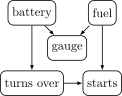

In [8]:
using TikzPictures, LaTeXStrings

# draw the nodes, then make the links
g = TikzPicture(L"""
\tikzstyle{every node} = [draw, minimum size=7mm, rounded corners=2mm]
\tikzset{>=latex}
\foreach \n/\x/\y/\label in {b/1/3/battery, f/3/3/fuel, g/2/2/gauge, t/1/1/turns over, s/3/1/starts}
    \node (\n) at (\x,\y) {\label};
\foreach \from/\to in {b/t, b/g, f/g, f/s, t/s}
    \draw [->] (\from) -- (\to);
""", options="scale=1.25, thick, transform shape")

5.1 (10 pts) Calculate the $p(f=\textsf{empty} | s=\textsf{no})$, the probability of the fuel tank being empty given that the car does not start.  Do this "by hand", i.e in manner similar to the **Inference** section in Barber 3.1.1.  Use the probabilities given in the exercise.  Show your work.
$$ p(f=\text{empty}|s=\text{no})=\frac{p(s=\text{no}|f=\text{empty})}{p(s=\text{no})} = \frac{\sum_t\sum_b p(s=\text{no}, f=\text{empty}, \ t, b)}{\sum_f\sum_t\sum_b p(s=\text{no},f,t,b)}= \frac{\sum_t\sum_b p(s=\text{no} \mid f=\text{empty},t)p(f, t)p(b)}{\sum_f\sum_t\sum_b p(s=\text{no} \mid f,t)p(f, t)p(b)}$$
$$= \frac{\sum_t\sum_b p(s=\text{no} \mid f=\text{empty},t) \ p(f)p(t \mid b)p(b)}{\sum_f\sum_t\sum_b p(s=\text{no} \mid f,t) \ p(f)p(t \mid b)p(b)}= \frac{0.0461715}{0.101756} \approx 0.4537$$

5.2 (5 pts) Implement this network using a toolbox for probabilistic models (e.g. `pgmpy` or `BayesNets.jl`). Use this to verify that your derivation and calculations are correct for the previous problem.

In [23]:
from pgmpy.models import BayesianNetwork as BN
from pgmpy.factors.discrete import TabularCPD as CPD
from pgmpy.inference import VariableElimination as VE

# create the model in python
model = BN([("battery", "gauge"), ("battery", "turns over"), ("turns over", "starts"),
    ("fuel", "gauge"), ("fuel", "starts")])
states = {"battery": ["good", "bad"],
          "fuel": ["full", "empty"],
          "gauge": ["full", "empty"],
          "turns over": ["yes", "no"],
          "starts": ["yes", "no"]}

# define the probabilities
model.add_cpds(CPD(variable="battery", variable_card=2, values=[[0.98], [0.02]], state_names={"battery":states["battery"]}),
               CPD(variable="fuel", variable_card=2, values=[[0.95], [0.05]], state_names={"fuel":states["fuel"]}),
               CPD(variable="gauge", variable_card=2, values=[[0.96, 0.03, 0.9, 0.01], [0.04, 0.97, 0.1, 0.99]], evidence=["battery", "fuel"], evidence_card=[2, 2], state_names={"gauge":states["gauge"], "battery":states["battery"], "fuel":states["fuel"]}),
               CPD(variable="turns over", variable_card=2, values=[[0.97, 0.02], [0.03, 0.98]], evidence=["battery"], evidence_card=[2], state_names={"turns over":states["turns over"], "battery":states["battery"]}),
               CPD(variable="starts", variable_card=2, values=[[0.99, 0.08, 0.0, 0.01], [0.01, 0.92, 1.0, 0.99]], evidence=["turns over", "fuel"], evidence_card=[2, 2], state_names={"starts":states["starts"], "turns over":states["turns over"], "fuel":states["fuel"]}))

# variable elimination
bn_infer = VE(model)

In [24]:
print(bn_infer.query(["fuel"], evidence={"starts":"no"}))

+-------------+-------------+
| fuel        |   phi(fuel) |
+=============+=============+
| fuel(full)  |      0.5463 |
+-------------+-------------+
| fuel(empty) |      0.4537 |
+-------------+-------------+


5.3 (10 pts) Suppose you have loaned this car to a friend. They call call you and announce, "the car won't start".  Illustrate your diagnostic and inference process by using the model to show how your beliefs change as you ask questions.  Your friend can only tell you the states of $t$ and $g$ (and you already know $s$).  Use two different scenarios, i.e. two differnt reasons why the car won't start.  For each scenario, your answer should discuss your choice of each question you pose to the network, and how it allows you to uncover the true cause the problem.

First example: no fuel, given car does not turn over: Given that "turns over" is "no" and that "starts" is "no", we can first query the probability of battery and fuel:

In [25]:
print(bn_infer.query(["fuel"], evidence={"starts":"no", "turns over":"no"}))
print(bn_infer.query(["battery"], evidence={"starts":"no", "turns over":"no"}))

+-------------+-------------+
| fuel        |   phi(fuel) |
+=============+=============+
| fuel(full)  |      0.9505 |
+-------------+-------------+
| fuel(empty) |      0.0495 |
+-------------+-------------+
+---------------+----------------+
| battery       |   phi(battery) |
+===============+================+
| battery(good) |         0.6000 |
+---------------+----------------+
| battery(bad)  |         0.4000 |
+---------------+----------------+


Based on this information, we can be fairly positive that the problem is caused by the fuel tank. However, we can ask for additional information regarding the gauge to further solidify this

In [27]:
print(bn_infer.query(["fuel"], evidence={"starts":"no", "turns over":"no", "gauge": "full"}))
print(bn_infer.query(["battery"], evidence={"starts":"no", "turns over":"no", "gauge": "full"}))

+-------------+-------------+
| fuel        |   phi(fuel) |
+=============+=============+
| fuel(full)  |      0.9988 |
+-------------+-------------+
| fuel(empty) |      0.0012 |
+-------------+-------------+
+---------------+----------------+
| battery       |   phi(battery) |
+===============+================+
| battery(good) |         0.6156 |
+---------------+----------------+
| battery(bad)  |         0.3844 |
+---------------+----------------+


Second Example: Bad battery given the gauge value first: Similarly, we can query on battery and fuel knowing that the gauge is empty

In [28]:
print(bn_infer.query(["fuel"], evidence={"starts":"no", "gauge":"empty"}))
print(bn_infer.query(["battery"], evidence={"starts":"no", "gauge":"empty"}))

+-------------+-------------+
| fuel        |   phi(fuel) |
+=============+=============+
| fuel(full)  |      0.0694 |
+-------------+-------------+
| fuel(empty) |      0.9306 |
+-------------+-------------+
+---------------+----------------+
| battery       |   phi(battery) |
+===============+================+
| battery(good) |         0.9410 |
+---------------+----------------+
| battery(bad)  |         0.0590 |
+---------------+----------------+


Consider now, we ask our friend if the car turns over and we learn that the car does not turn over.

In [29]:
print(bn_infer.query(["fuel"], evidence={"starts":"no", "gauge":"empty", "turns over":"no"}))
print(bn_infer.query(["battery"], evidence={"starts":"no", "gauge":"empty", "turns over":"no"}))

+-------------+-------------+
| fuel        |   phi(fuel) |
+=============+=============+
| fuel(full)  |      0.5567 |
+-------------+-------------+
| fuel(empty) |      0.4433 |
+-------------+-------------+
+---------------+----------------+
| battery       |   phi(battery) |
+===============+================+
| battery(good) |         0.4726 |
+---------------+----------------+
| battery(bad)  |         0.5274 |
+---------------+----------------+


We can see that the probability of the fuel tank being empty has decreased and that the probability of a bad batter has increased.